### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Athlete Event Dataset into DataFrame

In [2]:
events = pd.read_csv("./Datasets/athlete_events.csv")
events.tail(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


### Shape of Athlete Event Dataset

In [3]:
rows = events.shape[0]
cols = events.shape[1]

print(f"The above Athlete Event dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

The above Athlete Event dataset has  271116 rows and 15 columns .


### Loading NOC Regions Dataset into DataFrame

In [4]:
regions = pd.read_csv("./Datasets/noc_regions.csv")
regions.tail(2)

,NOC,region,notes
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


### Shape of Athlete Event Dataset

In [5]:
rows = regions.shape[0]
cols = regions.shape[1]

print(f"The above NOC Regions dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

The above NOC Regions dataset has  230 rows and 3 columns .


In [6]:
summer_events = events[events['Season'] == 'Summer']
summer_events.shape

(222552, 15)

In [7]:
main_events =  summer_events.merge(regions, on="NOC", how="left")
main_events.tail(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [8]:
main_events['region'].unique().shape

(206,)

There are few historic errors, like East-Germany and West-Germany.
Russia and USSR.

There are few, Nan values.

### Missing Values for features

In [9]:
[[features,main_events[features].isnull().sum()] for features in main_events.columns if main_events[features].isnull().sum()>0]

[['Age', 9189],
 ['Height', 51857],
 ['Weight', 53854],
 ['Medal', 188464],
 ['region', 370],
 ['notes', 218151]]

### Heat Map for Missing Values

<AxesSubplot:>

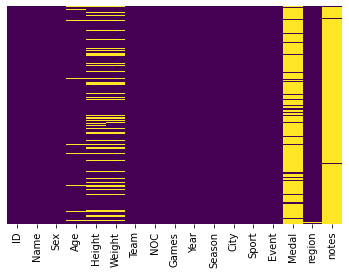

In [10]:
sns.heatmap(main_events.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Handling Duplicate Values

In [11]:
print("There are\033[1m", main_events.duplicated().sum(), "\033[0mDuplicate Values")

print("\nNow Removing Duplicates...", end="")
main_events.drop_duplicates(inplace=True)
print("Done")

print("\nNow checking for Duplicate Values again...\n", main_events.duplicated().sum())

There are 1385 Duplicate Values

Now Removing Duplicates...Done

Now checking for Duplicate Values again...
 0


In [177]:
data = clean_df[["Height","Weight","Sport"]]

sports = data['Sport'].unique().tolist()

sports

#data['Sport'] = np.where(data['Sport'] == 'Athletics', 1, 0)

['Shooting',
 'Athletics',
 'Handball',
 'Water Polo',
 'Football',
 'Basketball',
 'Volleyball',
 'Swimming',
 'Rowing',
 'Gymnastics',
 'Wrestling',
 'Table Tennis',
 'Sailing',
 'Canoeing',
 'Boxing',
 'Judo',
 'Cycling',
 'Tennis']

In [180]:
sports_list = sports.insert(0,'All')
sports_list

In [181]:
sports

['All',
 'All',
 'All',
 'Shooting',
 'Athletics',
 'Handball',
 'Water Polo',
 'Football',
 'Basketball',
 'Volleyball',
 'Swimming',
 'Rowing',
 'Gymnastics',
 'Wrestling',
 'Table Tennis',
 'Sailing',
 'Canoeing',
 'Boxing',
 'Judo',
 'Cycling',
 'Tennis']

In [136]:
data['Sport'] = data['Sport'].map({
     'Shooting':1,
     'Athletics':2,
     'Handball':3,
     'Water Polo':4,
     'Football':5,
     'Basketball':6,
     'Volleyball':7,
     'Swimming':8,
     'Rowing':9,
     'Gymnastics':10,
     'Wrestling':11,
     'Table Tennis':12,
     'Sailing':13,
     'Canoeing':14,
     'Boxing':15,
     'Judo':16,
     'Cycling':17,
     'Tennis':18
    
})

data

/tmp/ipykernel_48081/3777283702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sport'] = data['Sport'].map({


,Height,Weight,Sport
2902,178.0,95.0,1
3276,183.0,83.0,1
4492,180.0,73.0,2
5730,176.0,65.0,3
5731,176.0,65.0,3
...,...,...,...
221996,200.0,91.0,6
222018,187.0,77.0,6
222024,187.0,80.0,3
222105,183.0,80.0,3


<AxesSubplot:xlabel='Weight', ylabel='Height'>

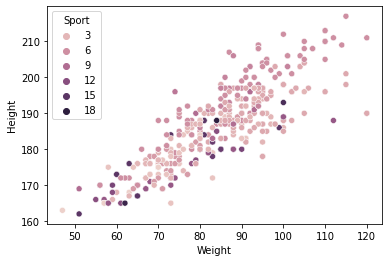

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Weight",
                y="Height",
                hue="Sport",
                data=data)

In [138]:
y = data['Sport'].copy()
X = data.drop('Sport', axis=1).copy()

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [174]:
classifier = KNeighborsClassifier(n_neighbors = 5) # n_neighbors >= 5 remain same
classifier = RandomForestClassifier(max_depth=14)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.5748031496062992

In [184]:
X_test

,Height,Weight
88564,203.0,104.0
205351,202.0,91.0
141881,182.0,83.0
92659,190.0,96.0
14398,188.0,88.0
...,...,...
14245,184.0,82.0
14142,178.0,75.0
143911,198.0,94.0
165922,173.0,68.0


In [188]:
#x = np.array([203.0,104.0]).reshape(-1, 1)
classifier.predict([[203.0,104.0]])

/home/utkarsh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([4])

In [148]:
confusion_matrix = confusion_matrix(y_test, y_pred)

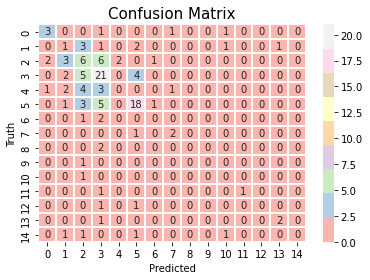

In [149]:
sns.heatmap(confusion_matrix,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [132]:
clean_df = main_events.dropna() 

In [45]:
clean_df.shape

(423, 20)

In [12]:
main_events['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [13]:
main_events = pd.concat([main_events,pd.get_dummies(main_events['Medal'])], axis=1)

In [14]:
main_events.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index().head()

,region,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,Russia,1220.0,974.0,994.0
2,Germany,1075.0,987.0,1064.0
3,UK,635.0,729.0,620.0
4,Italy,518.0,474.0,454.0


In [15]:
main_events[(main_events['NOC'] == 'IND') & (main_events['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [60]:
medal_tally = main_events.drop_duplicates(subset=['Team','region','Games','Year','City','Sport','Event','Medal'])
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [17]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally

,region,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0
1,Russia,592.0,498.0,487.0
2,Germany,444.0,457.0,491.0
3,UK,278.0,317.0,300.0
4,France,234.0,256.0,287.0
...,...,...,...,...
200,Lesotho,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0


In [19]:
medal_tally[medal_tally['region'] == 'India']

,region,Gold,Silver,Bronze
46,India,9.0,7.0,12.0


In [70]:
medal_tally["Total"] = medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"]
medal_tally.head()

/tmp/ipykernel_48081/1041441194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_tally["Total"] = medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,Total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,1
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0,0


### Fetching Unique Years

In [33]:
years = events['Year'].unique().tolist()
years.sort()
years.insert(0,'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

### Fetching COuntries Years

In [34]:
country = np.unique(medal_tally['region'].dropna().values).tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [58]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

In [53]:
def highlight(nation):
    if nation['region'] == 'Japan':
        return ['background-color: #f3f2f1']*6
    else:
        return ['background-color: white']*6

medal_tally[['region','Bronze','Silver','Gold','Total']].iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games sorted by Gold Medals [Top 15]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')

,region,Bronze,Silver,Gold,Total
0,USA,708.000000,802.000000,1035.000000,2545.000000
1,Russia,487.000000,498.000000,592.000000,1577.000000
2,Germany,491.000000,457.000000,444.000000,1392.000000
3,UK,300.000000,317.000000,278.000000,895.000000
4,France,287.000000,256.000000,234.000000,777.000000
5,China,154.000000,163.000000,228.000000,545.000000
6,Italy,198.000000,191.000000,219.000000,608.000000
7,Hungary,172.000000,154.000000,178.000000,504.000000
8,Sweden,188.000000,175.000000,150.000000,513.000000
9,Australia,197.000000,171.000000,150.000000,518.000000
